In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import threadpoolctl
# threadpoolctl.threadpool_limits(1)


In [2]:
# Check if the data file already exists
try:
    data = np.load('mnist_data.npz', allow_pickle=True)
    X_small = data['X_small']
    y_small = data['y_small']
#     print(y_small)
except FileNotFoundError:
    # If the data file does not exist, download and save the data
    X, y = fetch_openml('mnist_784', data_home='./', return_X_y=True)
    X = X / 255.
    X_small = X[:1000]
    y_small = y[:1000]
    # Save the data
    np.savez('mnist_data.npz', X_small=X_small, y_small=y_small)
    
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


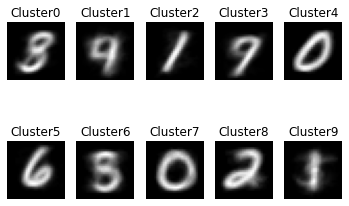

In [3]:
from sklearn.cluster import KMeans
n_clusters=10
# kmeans = KMeans(n_clusters=n_clusters).fit(X_train)
kmeans = KMeans(n_clusters=n_clusters).fit(X_small)
cluster_centers = kmeans.cluster_centers_.reshape(-1, 28, 28)

for i in range(n_clusters):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cluster_centers[i], cmap='gray')
    plt.title(f'Cluster{i}')
    plt.axis('off')
plt.show()

In [4]:
kmeans.labels_=y_small
cluster_labels = kmeans.predict(X_test)

In [5]:
cluster_digit_distribution = {i: {str(j): 0 for j in range(n_clusters)} for i in range(n_clusters)}

for i, label in enumerate(cluster_labels):
    true_digit = int(y_test[i])
    cluster_digit_distribution[label][str(true_digit)] += 1

for i in range(n_clusters):
    print(f'Cluster {i} Digit Distribution:')
    for j in range(n_clusters):
        print(f'Digit {j}: {cluster_digit_distribution[i][str(j)]} samples')


Cluster 0 Digit Distribution:
Digit 0: 0 samples
Digit 1: 0 samples
Digit 2: 1 samples
Digit 3: 15 samples
Digit 4: 0 samples
Digit 5: 5 samples
Digit 6: 0 samples
Digit 7: 0 samples
Digit 8: 9 samples
Digit 9: 1 samples
Cluster 1 Digit Distribution:
Digit 0: 0 samples
Digit 1: 0 samples
Digit 2: 2 samples
Digit 3: 0 samples
Digit 4: 12 samples
Digit 5: 0 samples
Digit 6: 2 samples
Digit 7: 3 samples
Digit 8: 0 samples
Digit 9: 6 samples
Cluster 2 Digit Distribution:
Digit 0: 0 samples
Digit 1: 9 samples
Digit 2: 2 samples
Digit 3: 0 samples
Digit 4: 0 samples
Digit 5: 0 samples
Digit 6: 1 samples
Digit 7: 3 samples
Digit 8: 1 samples
Digit 9: 2 samples
Cluster 3 Digit Distribution:
Digit 0: 0 samples
Digit 1: 0 samples
Digit 2: 0 samples
Digit 3: 0 samples
Digit 4: 3 samples
Digit 5: 0 samples
Digit 6: 0 samples
Digit 7: 15 samples
Digit 8: 0 samples
Digit 9: 9 samples
Cluster 4 Digit Distribution:
Digit 0: 7 samples
Digit 1: 0 samples
Digit 2: 0 samples
Digit 3: 0 samples
Digit 4: 0 

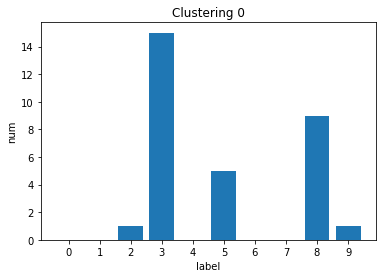

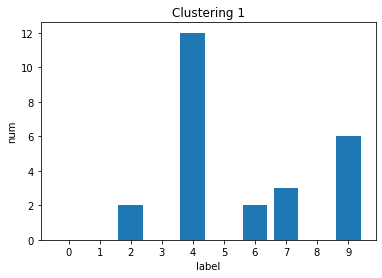

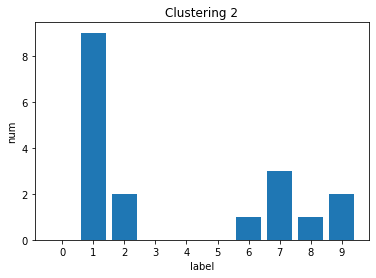

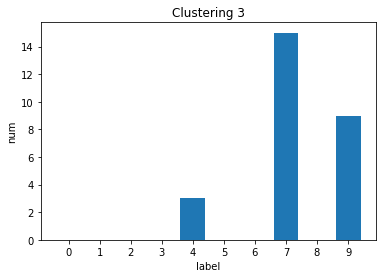

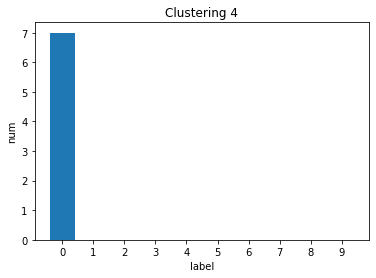

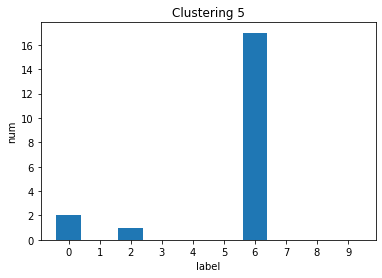

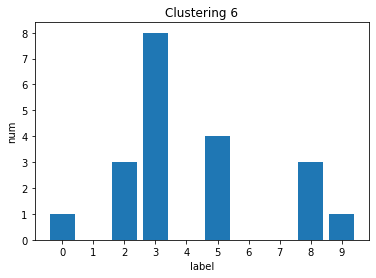

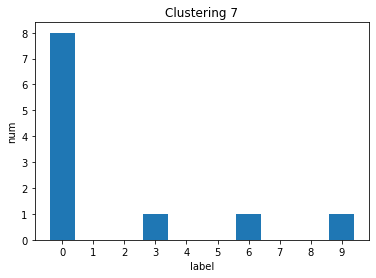

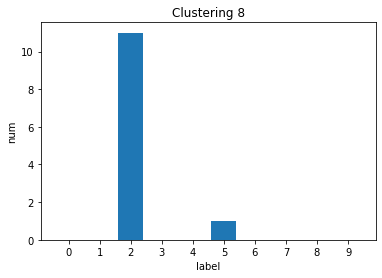

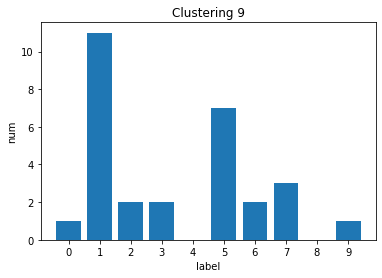

In [8]:
for i in range(n_clusters):
    cluster_label = i
    cluster_data = [cluster_digit_distribution[i][str(j)] for j in range(n_clusters)]
    plt.figure()
    plt.bar(range(n_clusters), cluster_data, tick_label=[str(j) for j in range(n_clusters)])
    plt.title(f'Clustering {cluster_label}')
    plt.xlabel('label')
    plt.ylabel('num')
    plt.show()